<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN, KMeansSMOTE
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler
from mlxtend import plotting
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import RidgeClassifier


In [ ]:
def Feature_3D(X,y,a,b,c,tit,T):

  model_tsne = TSNE(n_components=3)

  X_show = np.array(X)
  y_show = np.array(y)

  if T == "tsne":
    X_show = model_tsne.fit_transform(X_show)

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
  ax = plt.axes(projection='3d')
  ax.scatter3D(X_show[:, a], X_show[:, b], X_show[:, c],c=y_show, edgecolor="k")
  ax.set_title(tit)
  return plt.show()

def Feature_2D(X,y,a,b,tit,T):

  model_tsne = TSNE(n_components=2)

  X_show = np.array(X)
  y_show = np.array(y)

  if T == "tsne":
    X_show=model_tsne.fit_transform(X_show)

  x1=X_show[:,a]
  x2=X_show[:,b]

  plt.figure(figsize=(8,8))
  plt.scatter(x1,x2,c=y_show)
  plt.title(tit)
  plt.show()

def Matrix_Curve(model,X,y,model_name,matrix):

  train_sizes, train_scores, test_scores = learning_curve(model,X,y,
                                                          cv=10, scoring='f1_macro',
                                                          train_sizes=np.linspace(0.01, 1.0, 10))

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

  sns.heatmap(matrix, annot=True, cmap=sns.light_palette("seagreen", as_cmap=True), fmt='g', ax=ax1,
              xticklabels=["Positive","Negative"],
              yticklabels=["Positive","Negative"])
  ax1.set_title(f"Confusion Matrix for {str(model_name)}")

  ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
  ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
  ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
  ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
  ax2.set_title(f'Learning Curve for ({str(model_name)})')
  ax2.set_xlabel('Number of Training Examples')
  ax2.set_ylabel('Accuracy')
  ax2.legend(loc='lower right')
  ax2.grid(True)

  plt.show()

def Conf_class(T,P):

  matrix_cl = []

  for x,y in zip(np.array(T),P):
    if x == y:
      matrix_cl.append(x)
    elif x == 0 and x != y:
      matrix_cl.append(3)
    elif x == 1 and x != y:
      matrix_cl.append(4)
  return np.array(matrix_cl)

In [ ]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

# Attenction - Proprietary measure of mental focus from 0-100
# meditation - Proprietary measure of calmness from 0-100
# delta - 1-3 Hz of power spectrum
# theta - 4-7 Hz of power spectrum
# lowAlpha - Lower 8-11 Hz of power spectrum
# highAlpha - Higher 8-11 Hz of power spectrum
# lowBeta - Lower 12-29 Hz of power spectrum
# highBeta - Higher 12-29 Hz of power spectrum
# lowGamma - Lower 30-100 Hz of power spectrum
# highGamma - Higher 30-100 Hz of power spectrum
# classification - (0-sleepy/1-awake?)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [ ]:
df.shape

(3735, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [ ]:
df['classification'].unique()

array([0, 1])

In [ ]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [ ]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [ ]:
nany = df.isna().sum()
print("Liczba brakujących wartości:")
print(nany)

Liczba brakujących wartości:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [ ]:
corr = df.drop(columns = ['classification']).corr()
display(corr)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma
attention,1.000000,0.012465,-0.142241,-0.053082,-0.051414,0.047367,0.006725,0.166178,0.059002,0.032169
meditation,0.012465,1.000000,-0.075071,-0.081029,0.159976,0.015013,0.009094,0.027394,-0.097699,0.166853
delta,-0.142241,-0.075071,1.000000,0.380921,0.363079,0.257987,0.349557,0.225820,0.253741,0.287873
theta,-0.053082,-0.081029,0.380921,1.000000,0.456296,0.656068,0.344237,0.663608,0.285673,0.594448
lowAlpha,-0.051414,0.159976,0.363079,0.456296,1.000000,0.256059,0.693183,0.437718,0.294094,0.444335
highAlpha,0.047367,0.015013,0.257987,0.656068,0.256059,1.000000,0.271657,0.632582,0.281427,0.469033
lowBeta,0.006725,0.009094,0.349557,0.344237,0.693183,0.271657,1.000000,0.199992,0.403545,0.182727
highBeta,0.166178,0.027394,0.225820,0.663608,0.437718,0.632582,0.199992,1.000000,0.301577,0.650842
lowGamma,0.059002,-0.097699,0.253741,0.285673,0.294094,0.281427,0.403545,0.301577,1.000000,0.027007
highGamma,0.032169,0.166853,0.287873,0.594448,0.444335,0.469033,0.182727,0.650842,0.027007,1.000000


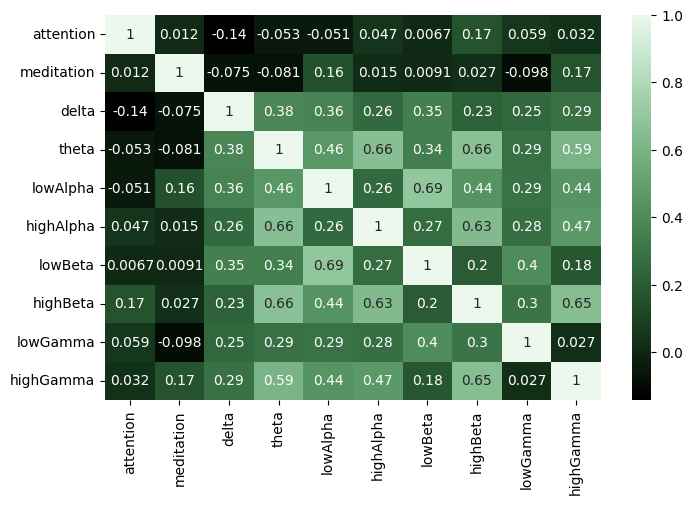

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True,cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True))
plt.show()

In [ ]:
#from pandas.profiling import ProfileReport

In [ ]:
#profile = ProfileReport(df)
#profile

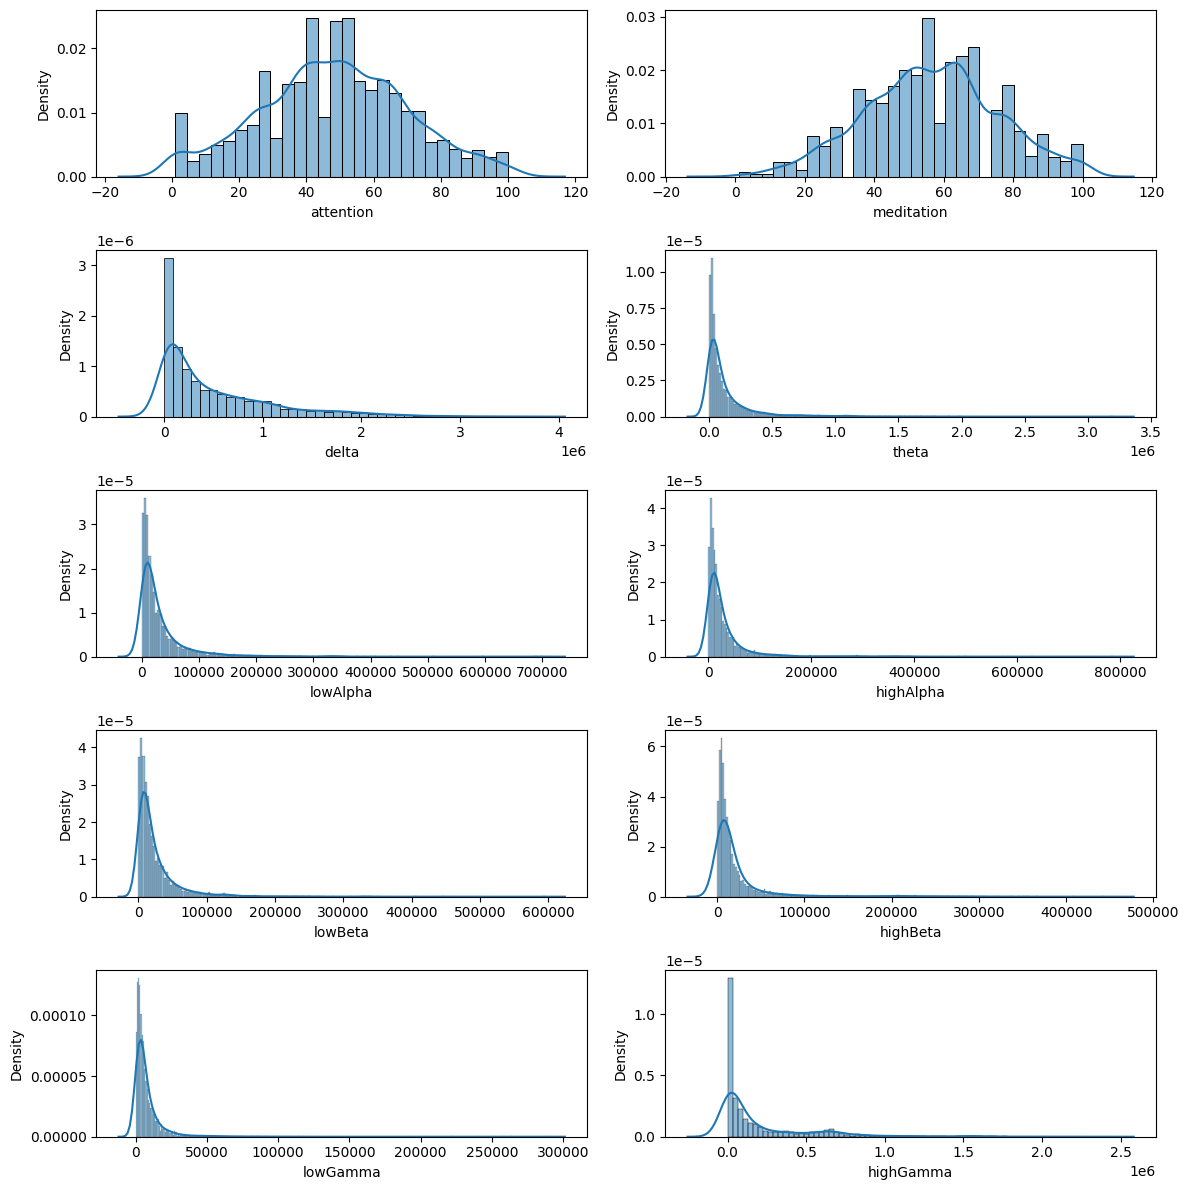

In [ ]:
cols = list(df.columns)[0:len(df.columns)-1]
rows_plot = 5
cols_plot = 2
counter = 1
plt.rcParams["figure.figsize"] = [12, 12]
for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=4))
    counter += 1
plt.tight_layout()
plt.show()

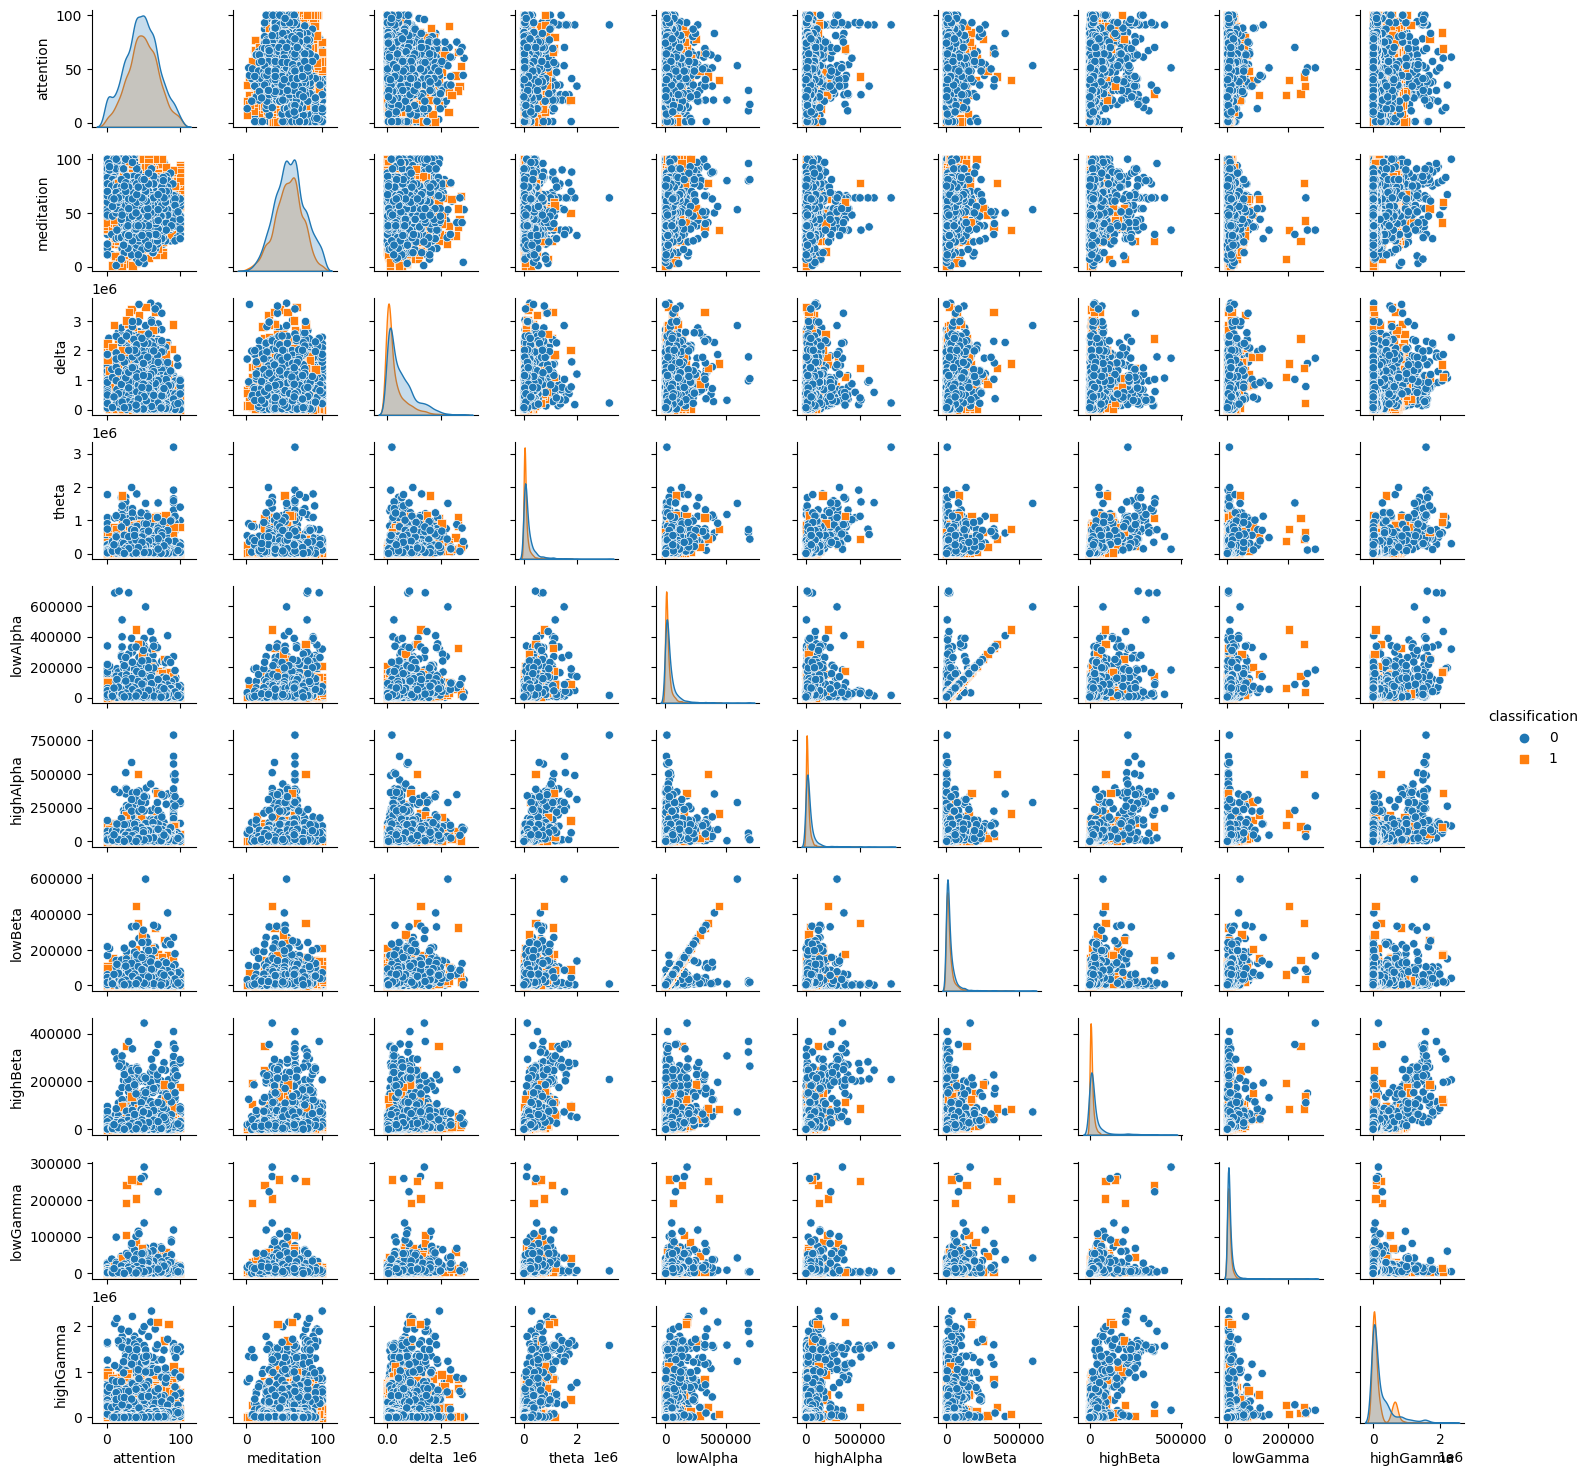

In [ ]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

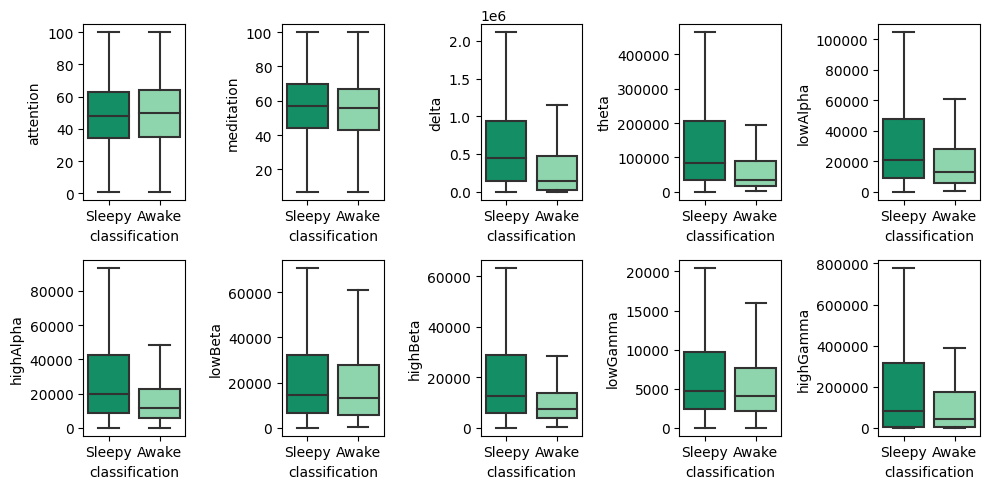

In [ ]:
rows_plot=2
cols_plot=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for col in cols:
    plt.subplot(rows_plot,cols_plot,counter)
    sns.boxplot(x='classification',y=col,data=df,showfliers=False,palette=['#00A36C', '#82E0AA'])
    plt.xticks([0,1],["Sleepy","Awake"])
    counter+=1

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sleepy/Awake vs Different Wave Frequency')

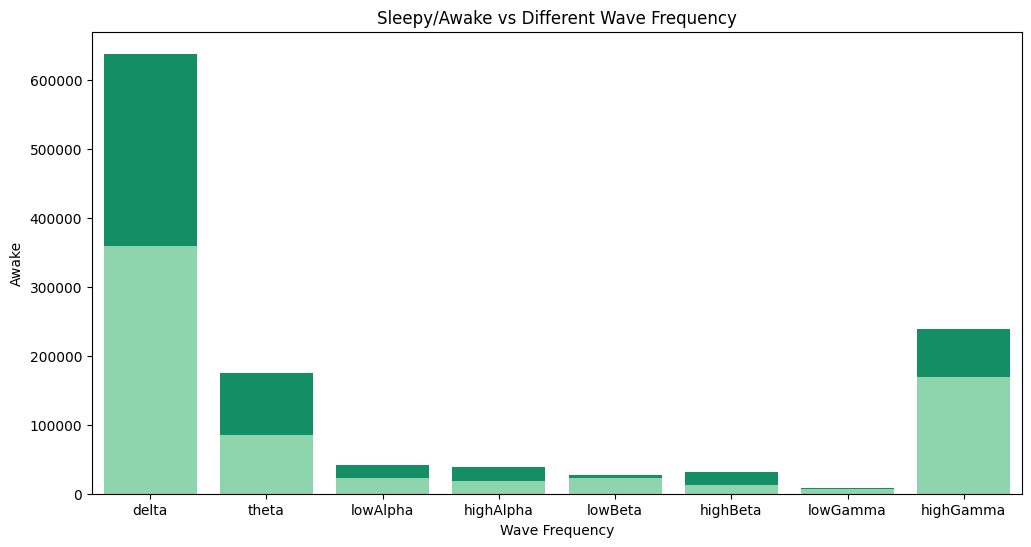

In [ ]:
state_means = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()

state_means = state_means.T.reset_index()

state_means.columns = ['Wave Frequency', 'Sleepy', 'Awake']

state_band = ['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']

state_means = state_means[state_means['Wave Frequency'].isin(state_band)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency', y='Sleepy', data=state_means, color='#00A36C', label='Sleepy')
sns.barplot(x='Wave Frequency', y='Awake', data=state_means, color='#82E0AA', label='Awake')
plt.title('Sleepy/Awake vs Different Wave Frequency')

# Inżynieria cech

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


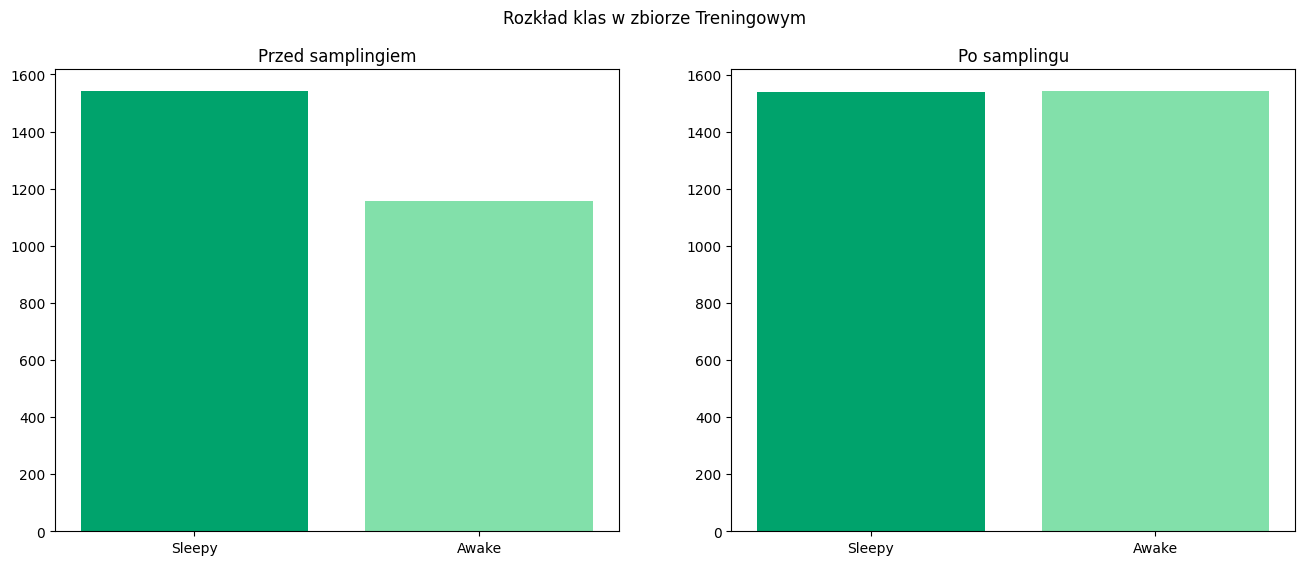

In [ ]:
ada = ADASYN(sampling_strategy='minority', random_state=42)
km = KMeansSMOTE(random_state=42)

X = df.drop(columns = ['classification','attention', 'meditation'])
y = df['classification']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
X_train_km, y_train_km = km.fit_resample(X_train,y_train)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

fig.suptitle("Rozkład klas w zbiorze Treningowym")

ax1.bar(y_train.unique(),((y_train == 0).sum(),(y_train == 1).sum()),color=['#00A36C', '#82E0AA'],tick_label=['Sleepy','Awake'])
ax1.set_title("Przed samplingiem")
ax2.bar(y_train.unique(),((y_train_km == 0).sum(),(y_train_km == 1).sum()),color=['#00A36C', '#82E0AA'],tick_label=['Sleepy','Awake'])
ax2.set_title("Po samplingu")
plt.show()

In [ ]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_sampled.shape: {X_train_ada.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (2697, 8)
X_train_sampled.shape: (3113, 8)
X_val.shape: (477, 8)
X_test.shape: (561, 8)


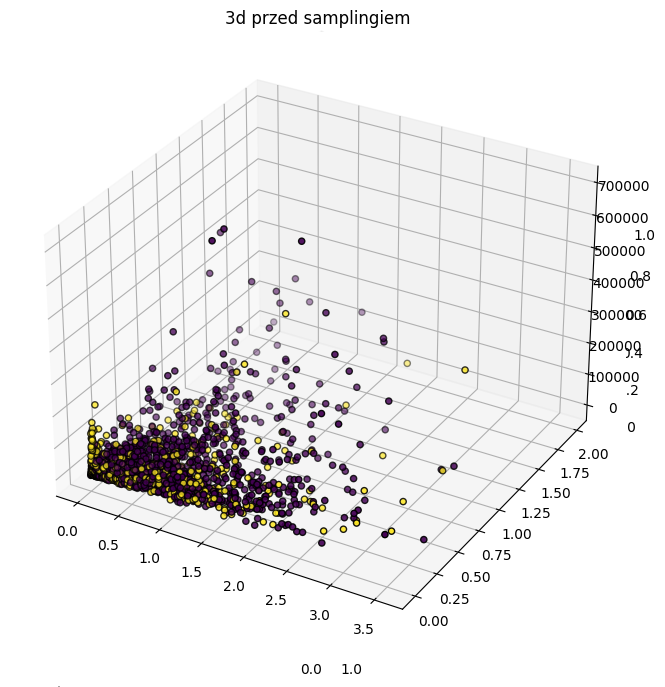

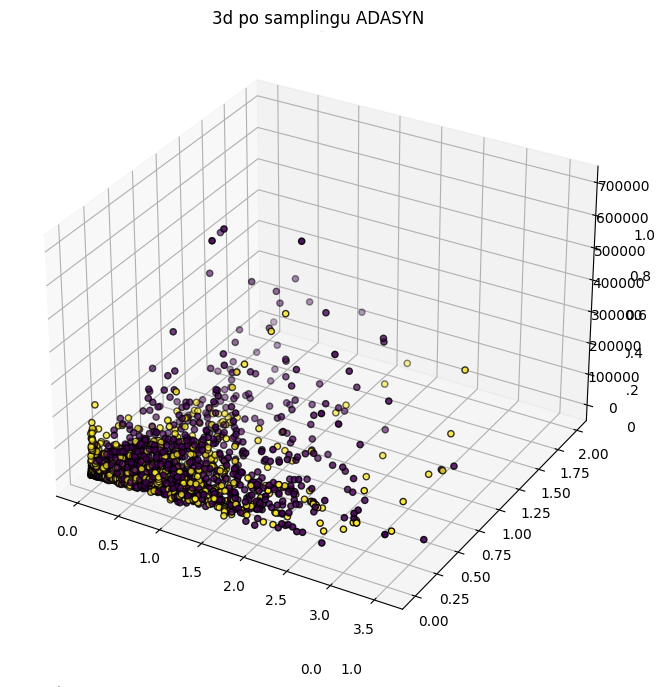

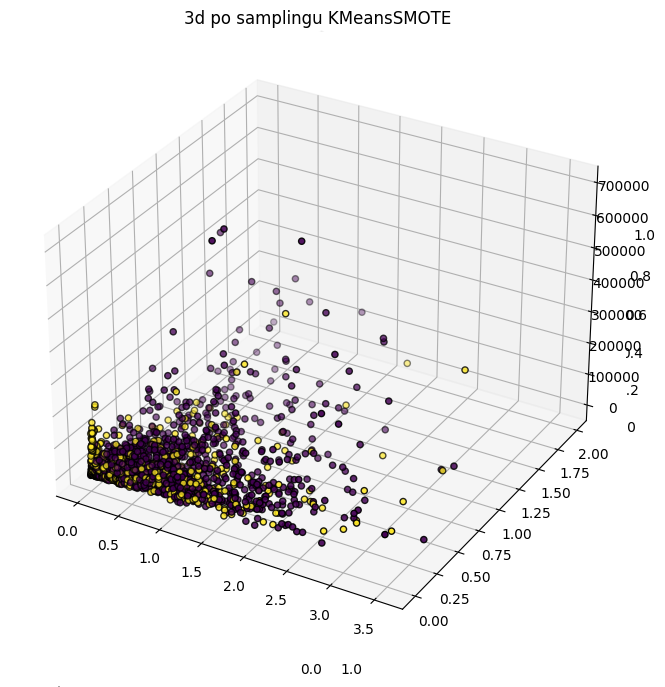

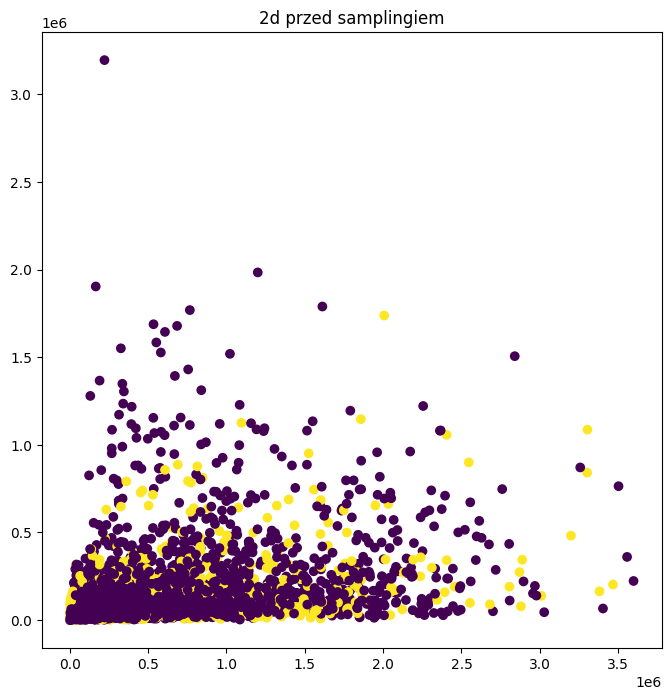

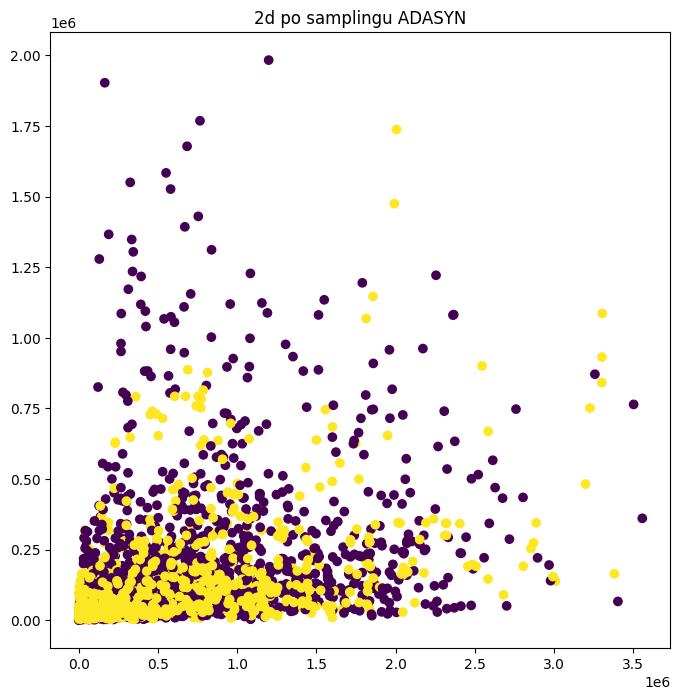

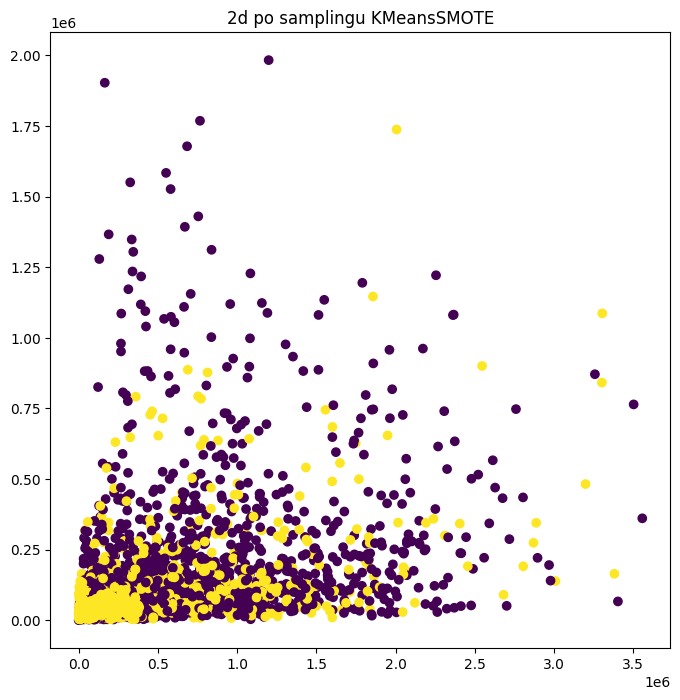

In [ ]:
Feature_3D(X_train,y_train,0,1,2,str("3d przed samplingiem"),str("k"))
Feature_3D(X_train_ada,y_train_ada,0,1,2,str("3d po samplingu ADASYN"),str("k"))
Feature_3D(X_train_km,y_train_km,0,1,2,str("3d po samplingu KMeansSMOTE"),str("k"))
Feature_2D(X,y,0,1,str("2d przed samplingiem"),str("k"))
Feature_2D(X_train_ada,y_train_ada,0,1,str("2d po samplingu ADASYN"),str("k"))
Feature_2D(X_train_km,y_train_km,0,1,str("2d po samplingu KMeansSMOTE"),str("k"))

# KNN

In [ ]:
dims = [2,3,4,5,6,7,8]
for dim in dims:
  if dim != 8:
    model_iso = Isomap(n_components=dim)
    X_train_iso = model_iso.fit_transform(X_train_km)
    X_val_iso = model_iso.transform(X_val)
  else:
    X_train_iso=X_train_km
    X_val_iso=X_val



  params = {"n_neighbors": [3,5,7,9,11],
              "algorithm": ["ball_tree","kd_tree","brute"],
              "leaf_size": [15,30,45],
              "p": [1,2]}

  gs_km = GridSearchCV(KNeighborsClassifier(),
                      param_grid=params,
                      cv=10,
                      scoring="f1_macro")

  gs_km.fit(X_train_iso,y_train_km)

  y_pred_gs = gs_km.predict(X_val_iso)
  print(f"Class report for {dim}D:\n{classification_report(y_val,y_pred_gs)}")

Class report for 2D:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       273
           1       0.61      0.65      0.63       204

    accuracy                           0.67       477
   macro avg       0.67      0.67      0.67       477
weighted avg       0.68      0.67      0.67       477

Class report for 3D:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       273
           1       0.60      0.66      0.63       204

    accuracy                           0.67       477
   macro avg       0.66      0.67      0.67       477
weighted avg       0.67      0.67      0.67       477

Class report for 4D:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       273
           1       0.61      0.61      0.61       204

    accuracy                           0.67       477
   macro avg       0.66      0.66      0.66       477
weighted av

Accuracy score: 0.6918238993710691
Precision score: 0.6266666666666667
Recall score: 0.6911764705882353
matt_score: 0.38006012860791655
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       273
           1       0.63      0.69      0.66       204

    accuracy                           0.69       477
   macro avg       0.69      0.69      0.69       477
weighted avg       0.70      0.69      0.69       477



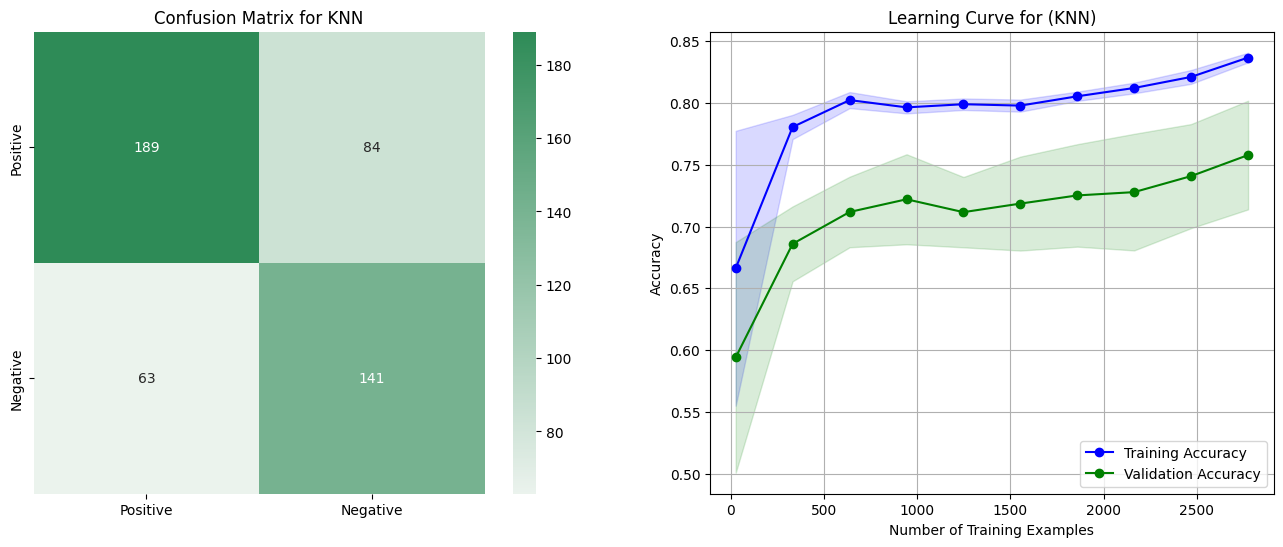

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=gs_km.best_params_["n_neighbors"],
                                algorithm=gs_km.best_params_["algorithm"],
                                leaf_size=gs_km.best_params_["leaf_size"],
                                p=gs_km.best_params_["p"])



model_kn.fit(X_train_km, y_train_km)

y_pred_kn = model_kn.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_kn)}")
print(f"Precision score: {precision_score(y_val,y_pred_kn)}")
print(f"Recall score: {recall_score(y_val,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_kn)}")
matrix_kn = confusion_matrix(y_val,y_pred_kn)

print(classification_report(y_val,y_pred_kn))

Matrix_Curve(model_kn,X_train_km,y_train_km,str("KNN"),matrix_kn)

In [ ]:
conf_class_kn = Conf_class(y_val,y_pred_kn)

In [ ]:
Feature_2D(X_val,conf_class_kn,0,1,str("Predicted"),str("k"))
Feature_2D(X_val,y_val,0,1,str("True"),str("k"))

NameError: ignored

# Ridge

In [ ]:
params = {"alpha": [0.000001,0.00001,0.0001,1]}

gs_ridge = GridSearchCV(RidgeClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

gs_ridge.fit(X_train_ada,y_train_ada)

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 1]},
             scoring='f1_macro')

Accuracy score: 0.5932914046121593
Precision score: 0.5149700598802395
Recall score: 0.8431372549019608
matt_score: 0.26966651500256655
              precision    recall  f1-score   support

           0       0.78      0.41      0.53       273
           1       0.51      0.84      0.64       204

    accuracy                           0.59       477
   macro avg       0.65      0.62      0.59       477
weighted avg       0.66      0.59      0.58       477



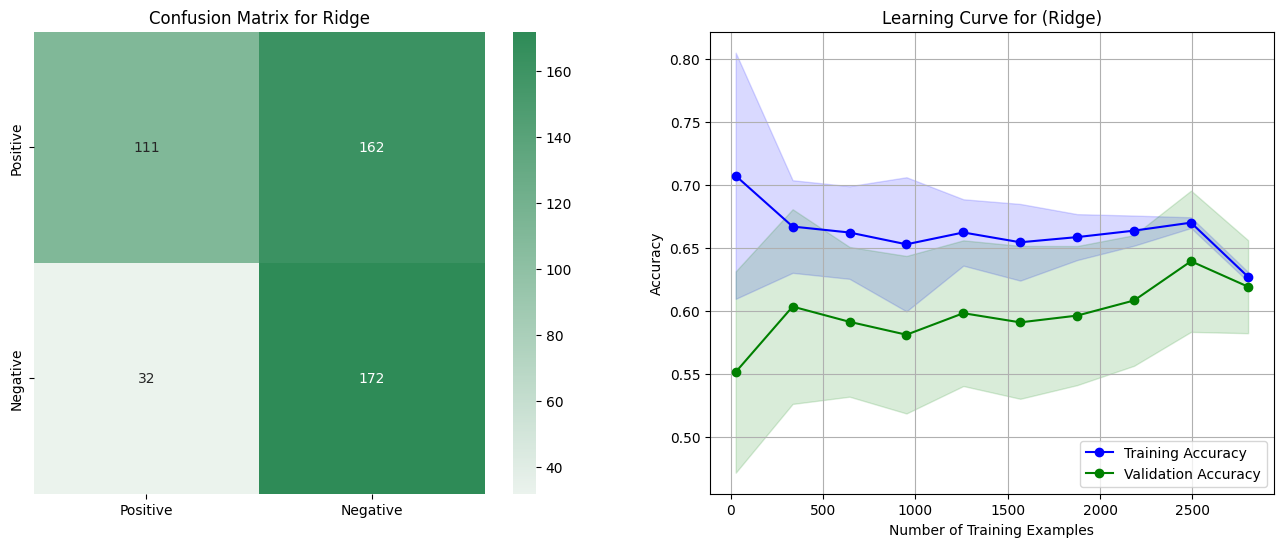

In [ ]:
from sklearn.linear_model import RidgeClassifier

model_ridge = RidgeClassifier(alpha=gs_ridge.best_params_["alpha"])

model_ridge.fit(X_train_ada,y_train_ada)

y_pred_ridge = model_ridge.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_ridge)}")
print(f"Precision score: {precision_score(y_val,y_pred_ridge)}")
print(f"Recall score: {recall_score(y_val,y_pred_ridge)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_ridge)}")
matrix_ridge = confusion_matrix(y_val,y_pred_ridge)

print(classification_report(y_val,y_pred_ridge))

Matrix_Curve(model_ridge,X_train_ada,y_train_ada,str("Ridge"),matrix_ridge)

In [ ]:
conf_class_ridge = Conf_class(y_val, y_pred_ridge)

In [ ]:
Feature_2D(X_val,conf_class_ridge,0,1,str("Predicted ridge"),str("k"))
Feature_2D(X_val,y_val,0,1,str("True ridge"),str("k"))


NameError: ignored

In [ ]:
pred_train_proba_ridge = model_ridge.decision_function(X_train_ada)
pred_val_proba_ridge = model_ridge.decision_function(X_val)

roc_auc_train_ridge = roc_auc_score(y_train_ada, pred_train_proba_ridge)
roc_auc_val_ridge = roc_auc_score(y_val, pred_val_proba_ridge)

print(f"AUC dla zbioru treningowego: {roc_auc_train_ridge}")
print(f"AUC dla zbioru walidacyjnego: {roc_auc_val_ridge}")

fpr_train_ridge, tpr_train_ridge, _ = roc_curve(y_train_ada, pred_train_proba_ridge)
fpr_val_ridge, tpr_val_ridge, _ = roc_curve(y_val, pred_val_proba_ridge)

plt.figure(figsize=(10, 6))

plt.plot(fpr_train_ridge, tpr_train_ridge, label=f'treningowy - AUC: {roc_auc_train_ridge:.2f}')
plt.plot(fpr_val_ridge, tpr_val_ridge, label=f'walidacyjny - AUC: {roc_auc_val_ridge:.2f}')
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), '--')

plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC dla modelu Ridge')
plt.legend()
plt.show()


In [ ]:
feature_names = ["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]

coefficients = model_ridge.coef_[0]

sorted_idx = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

plt.figure(figsize=(12, 6))
plt.barh(sorted_feature_names, sorted_coefficients, align='center')
plt.xlabel('Współczynniki')
plt.title('Ważność cech według współczynników RidgeClassifier')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = model_ridge.decision_function(X_val)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

average_precision = average_precision_score(y_val, y_scores)

plt.figure(figsize=(12, 6))
plt.plot(recalls, precisions, label=f'Krzywa Precision-Recall (AP = {average_precision:.2f})', lw=2)
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.title('Krzywa Precision-Recall')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
unique_classes = np.unique(y_val)

bins = np.arange(len(unique_classes) + 1) - 0.5

plt.figure(figsize=(10,7))
plt.hist(misclassified_classes, bins=bins, align='mid', rwidth=0.8, color='#00A36C')
plt.title('Histogram błędnie sklasyfikowanych klas')
plt.xlabel('Klasy')
plt.ylabel('Liczba błędnych klasyfikacji')
plt.xticks(ticks=np.arange(len(unique_classes)), labels=unique_classes)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(y_pred_ridge, bins=np.arange(3) - 0.5, align='mid', rwidth=0.8, color='blue', alpha=0.7, label='Prognozy')
plt.title('Rozkład prognoz modelu RidgeClassifier')
plt.xlabel('Klasy')
plt.ylabel('Liczba prognoz')
plt.xticks(ticks=np.arange(2), labels=[0, 1])
plt.legend()
plt.show()


# Tree

Accuracy score: 0.6016771488469602
Precision score: 0.5224358974358975
Recall score: 0.7990196078431373
matt_score: 0.2633879060020911
              precision    recall  f1-score   support

           0       0.75      0.45      0.57       273
           1       0.52      0.80      0.63       204

    accuracy                           0.60       477
   macro avg       0.64      0.63      0.60       477
weighted avg       0.65      0.60      0.59       477



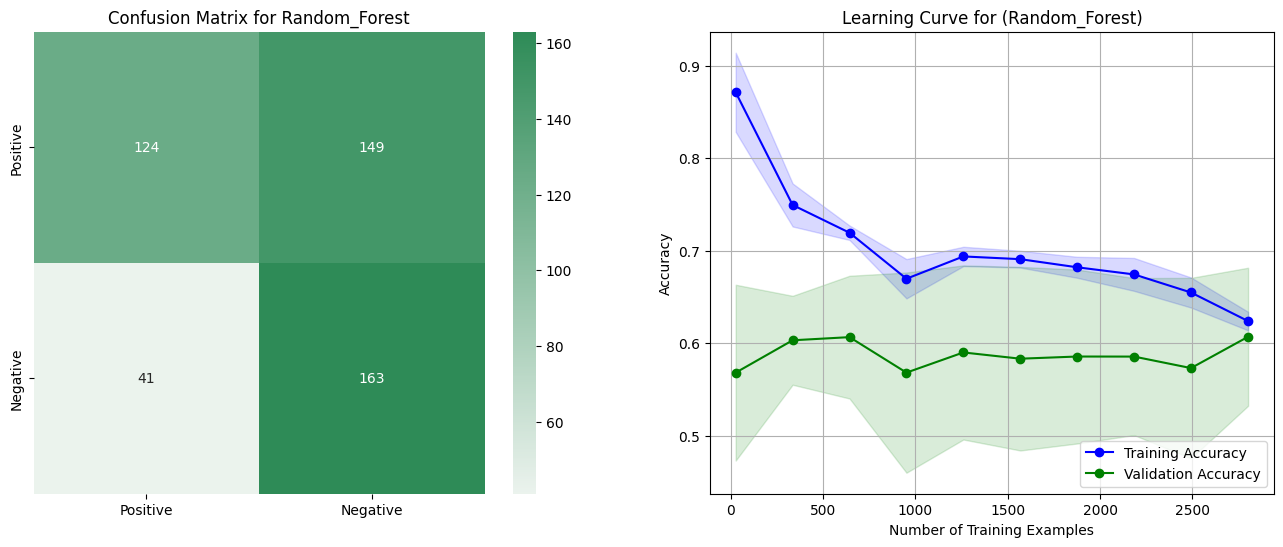

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)

model_tree.fit(X_train_ada,y_train_ada)

y_pred_tree = model_tree.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_tree)}")
print(f"Precision score: {precision_score(y_val,y_pred_tree)}")
print(f"Recall score: {recall_score(y_val,y_pred_tree)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_tree)}")
matrix_tree = confusion_matrix(y_val,y_pred_tree)

print(classification_report(y_val,y_pred_tree))

Matrix_Curve(model_tree,X_train_ada,y_train_ada,str("Decision Tree"),matrix_tree)

# Random Forest

In [ ]:
params_rf = {"n_estimators": [150,250],
          "criterion": ["gini","entropy"],
          "max_depth": [25,35],
          "min_samples_split": [5,15],
          "min_samples_leaf": [5,15]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=params_rf,
                  cv=10,
                  scoring="f1_macro")

gs_rf.fit(X_train_ada,y_train_ada)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 35], 'min_samples_leaf': [5, 15],
                         'min_samples_split': [5, 15],
                         'n_estimators': [150, 250]},
             scoring='f1_macro')

In [ ]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 250}

Accuracy score: 0.7295597484276729
Precision score: 0.6666666666666666
Recall score: 0.7352941176470589
matt_score: 0.456456538783212
              precision    recall  f1-score   support

           0       0.79      0.73      0.75       273
           1       0.67      0.74      0.70       204

    accuracy                           0.73       477
   macro avg       0.73      0.73      0.73       477
weighted avg       0.73      0.73      0.73       477



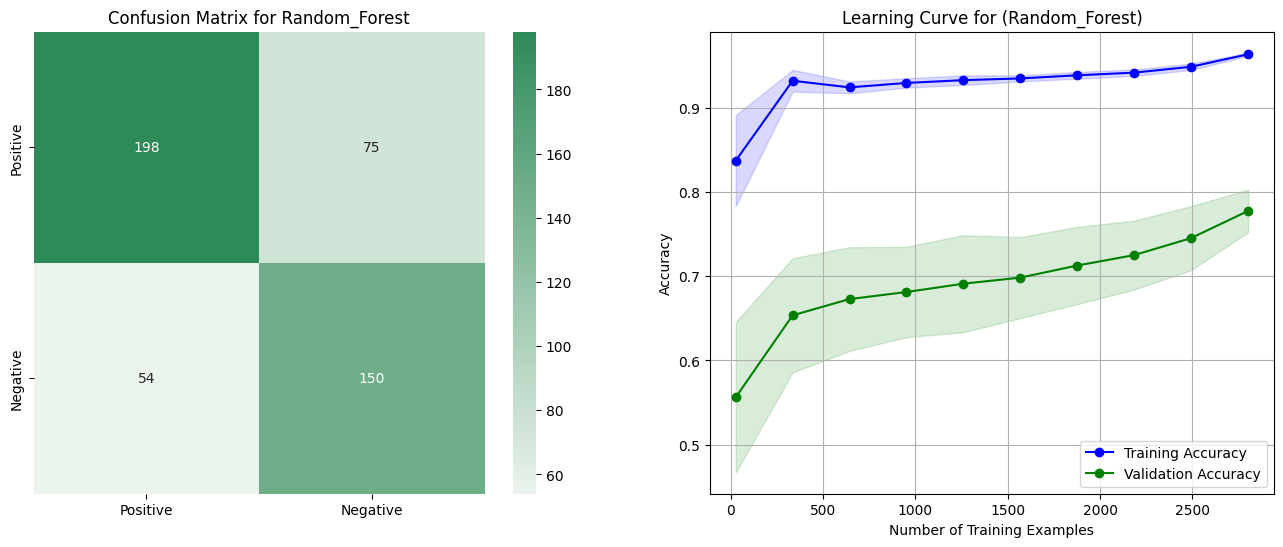

In [ ]:
model_rf = RandomForestClassifier(criterion=gs_rf.best_params_['criterion'],
                                  max_depth=gs_rf.best_params_['max_depth'],
                                  min_samples_leaf=gs_rf.best_params_['min_samples_leaf'],
                                  min_samples_split=gs_rf.best_params_['min_samples_split'],
                                  n_estimators=gs_rf.best_params_['n_estimators'],
                                  random_state=42)

model_rf.fit(X_train_ada, y_train_ada)

y_pred_rf = model_rf.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_rf)}")
print(f"Precision score: {precision_score(y_val,y_pred_rf)}")
print(f"Recall score: {recall_score(y_val,y_pred_rf)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_rf)}")
matrix_rf = confusion_matrix(y_val,y_pred_rf)

print(classification_report(y_val,y_pred_rf))

Matrix_Curve(model_rf,X_train_ada,y_train_ada,str("Random_Forest"),matrix_rf)

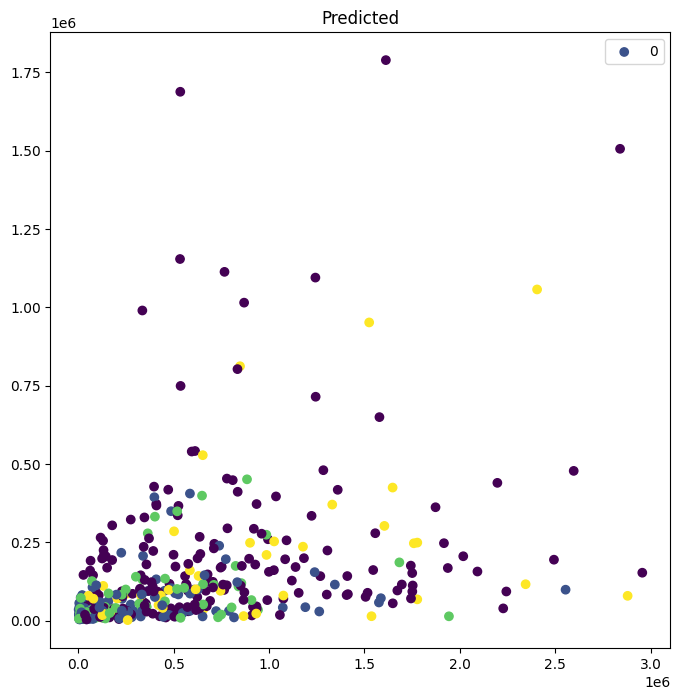

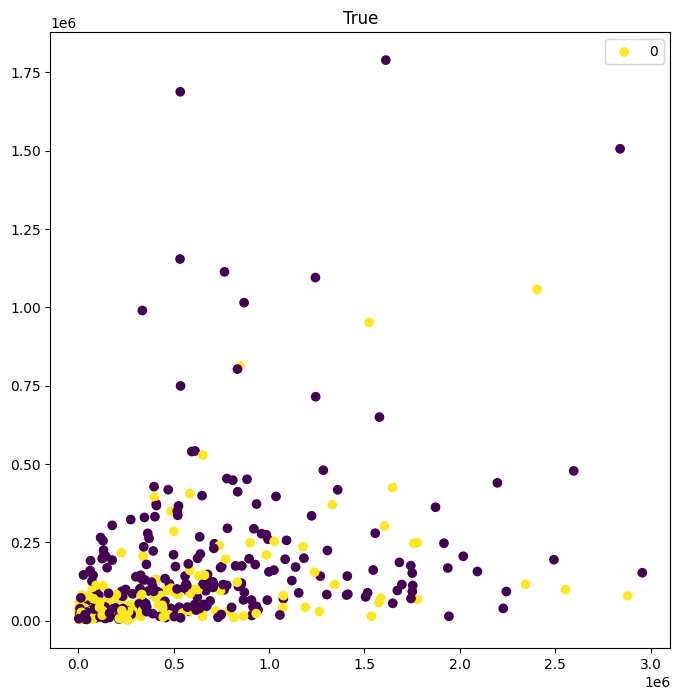

In [ ]:
conf_class_rf = Conf_class(y_val,y_pred_rf)
Feature_2D(X_val,conf_class_rf,0,1,str("Predicted"),str("k"))
Feature_2D(X_val,y_val,0,1,str("True"),str("k"))

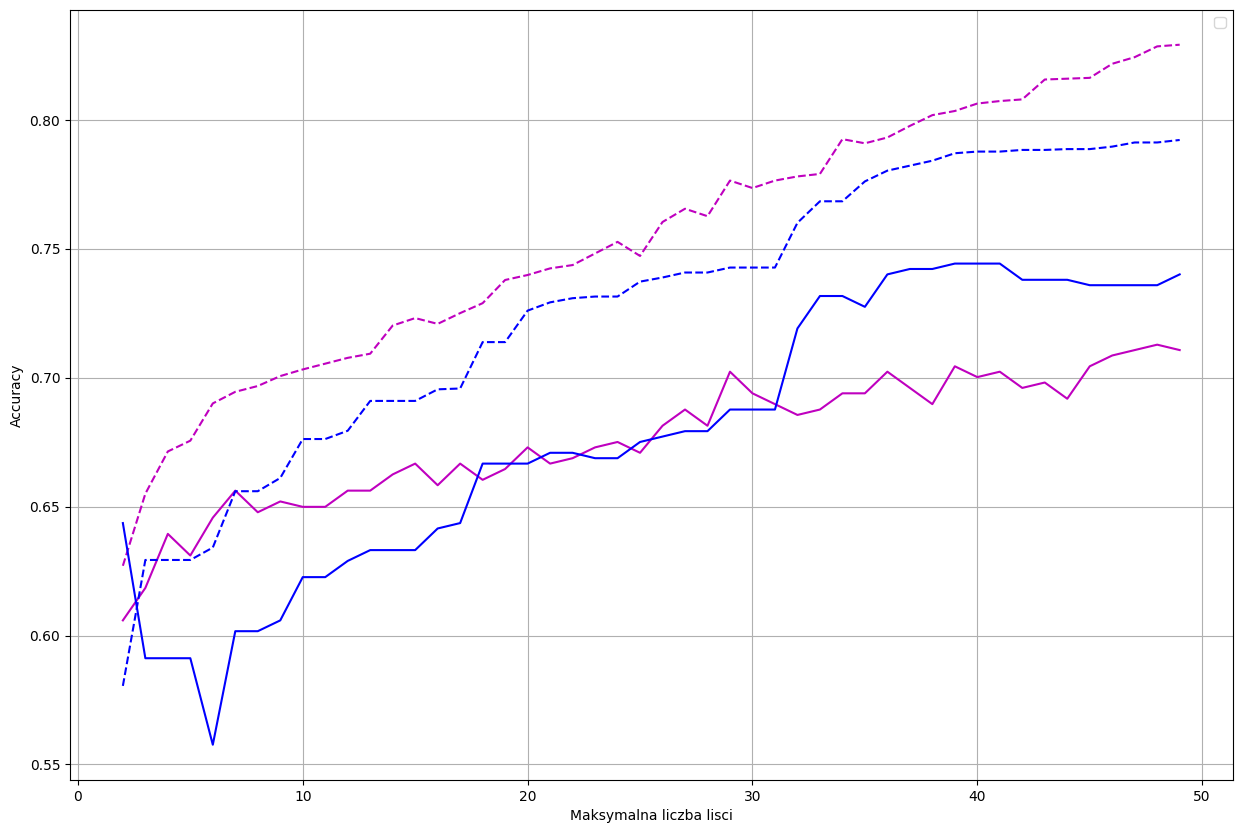

In [ ]:
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i,
                                               criterion='entropy',
                                               max_depth=25).fit(X_train_ada,y_train_ada)
    tree_train_scores.append(tree_1_classifier.score(X_train_ada,y_train_ada))
    tree_test_scores.append(tree_1_classifier.score(X_val,y_val))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i,
                                               criterion='entropy',
                                               max_depth=25,
                                               n_estimators=250).fit(X_train_ada,y_train_ada)
    rf_train_scores.append(rf_1_classifier.score(X_train_ada,y_train_ada))
    rf_test_scores.append(rf_1_classifier.score(X_val,y_val))

plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.legend(loc="best")
plt.grid()
plt.show()

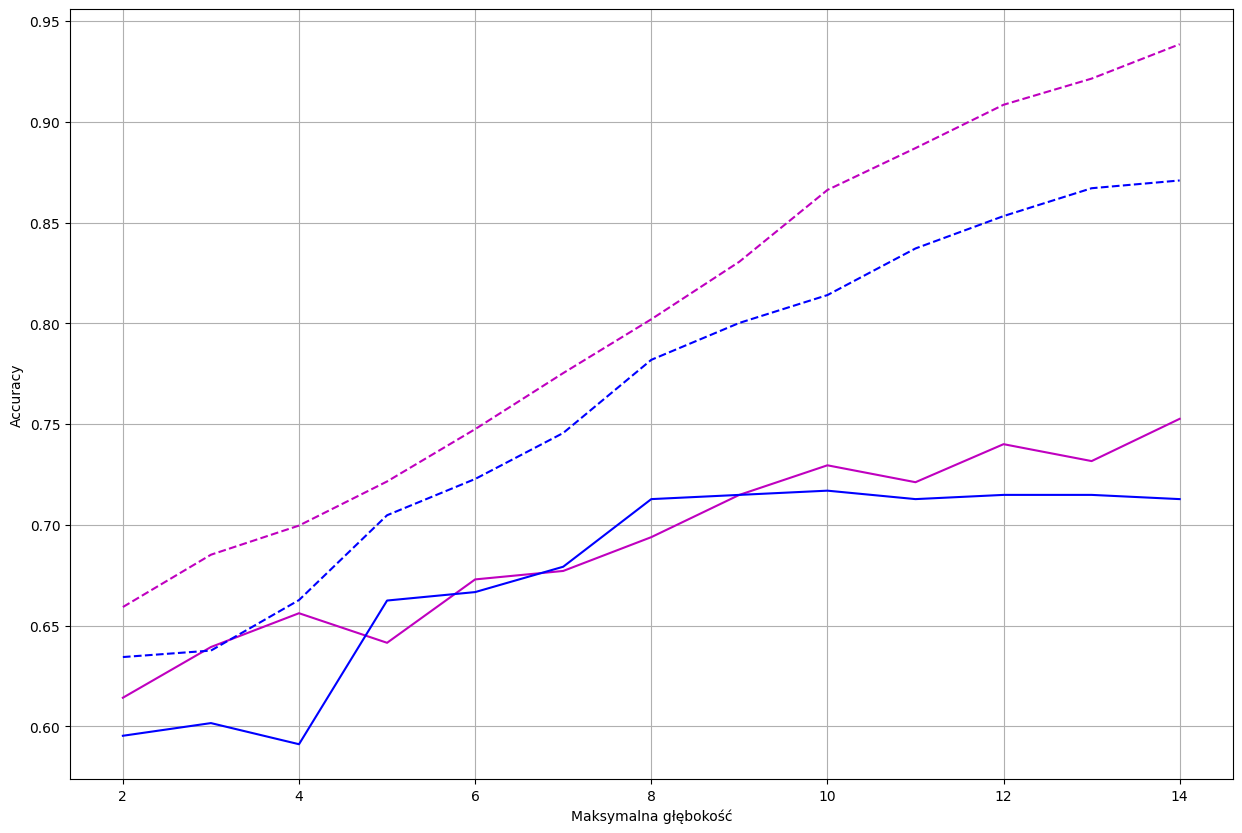

In [ ]:
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i,
                                               criterion="entropy",
                                               min_samples_split=5,
                                               min_samples_leaf=5).fit(X_train_ada,y_train_ada)
    tree_train_scores.append(tree_1_classifier.score(X_train_ada,y_train_ada))
    tree_test_scores.append(tree_1_classifier.score(X_val,y_val))

    rf_1_classifier = RandomForestClassifier(max_depth=i,
                                             criterion="entropy",
                                             min_samples_split=5,
                                             min_samples_leaf=5,
                                             n_estimators=250).fit(X_train_ada,y_train_ada)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_val,y_val))

plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
pred_train_proba = model_rf.predict_proba(X_train_ada)[:,1]
pred_val_proba = model_rf.predict_proba(X_val)[:,1]

roc_auc_train = roc_auc_score(y_train_ada, pred_train_proba)
roc_auc_val = roc_auc_score(y_val, pred_val_proba)
print(f"AUC dla zbioru treningowego: {roc_auc_train}")
print(f"AUC dla zbioru walidacyjnego: {roc_auc_val}")

fpr_train, tpr_train, _ = roc_curve(y_train_ada, pred_train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, pred_val_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'treningowy - AUC: {roc_auc_train:.2f}')
plt.plot(fpr_val, tpr_val, label=f'walidacyjny - AUC: {roc_auc_val:.2f}')
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), '--')

plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC dla modelu RF')
plt.legend()
plt.show()


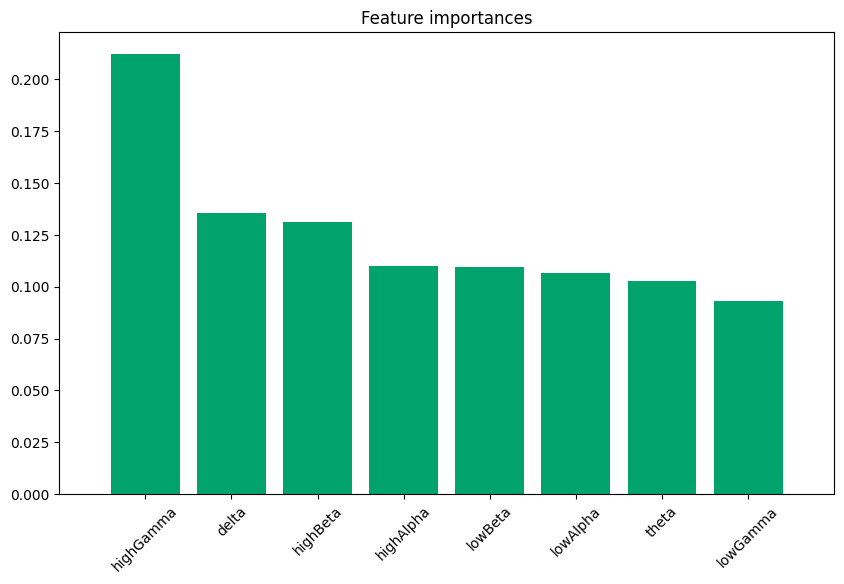

In [ ]:
feature_names = ['delta', 'theta', 'lowAlpha',
                 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']

importances = model_rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(feature_names)), importances[indices],
       color="#00A36C", align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.xlim([-1, len(feature_names)])
plt.show()

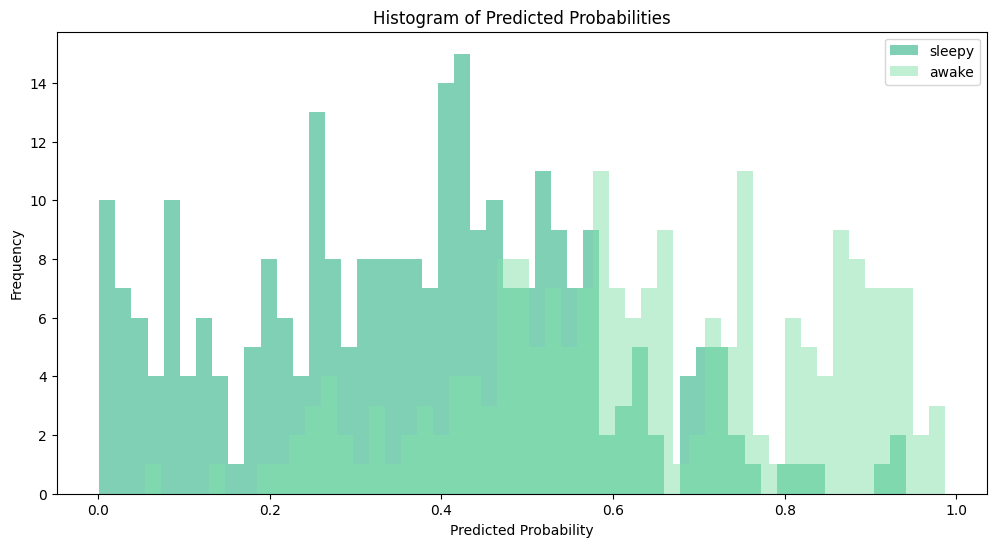

In [ ]:
y_pred_proba = model_rf.predict_proba(X_val)[:, 1]


plt.figure(figsize=(12, 6))
plt.hist(y_pred_proba[y_val == 0], bins=50, label='sleepy', alpha=0.5, color='#00A36C')
plt.hist(y_pred_proba[y_val == 1], bins=50, label='awake', alpha=0.5, color='#82E0AA')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend(loc='upper right')
plt.show()

In [ ]:
features = [0, 1]  # Replace these with the indices or names of features you want to analyze

# Create the partial dependence plot
plot_partial_dependence(model_rf, X_val, features, grid_resolution=50)
plt.suptitle('Partial dependence plots')
plt.subplots_adjust(top=0.9)  # adjust the Figure in plt.subplots_adjust

# Show the plot
plt.show()

NameError: ignored

## Podsumowanie

In [ ]:
# result = pd.concat([df_lr,df_kn, df_tree, df_rf, df_svm])
# result

In [ ]:
# print("Projekt końcowy")